In [2]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
base_dir = '/content/drive/My Drive/dataset'
!ls "/content/drive/My Drive/dataset"

assets	bahan  keras_metadata.pb  saved_model.pb  tes  validasi  variables


In [5]:
#menentukan direktori
bahan_dir = os.path.join(base_dir, 'bahan')
dttes_dir = os.path.join(base_dir, 'tes')
dtvalid_dir = os.path.join(base_dir,'validasi')


In [11]:
#isi bhn
limapuluhdl_dir = os.path.join(bahan_dir, 'lbuaya/')
limapuluhdn_dir = os.path.join(bahan_dir, 'nangka/')

print('jumlah data tiap fldr')
print('jumlah gambar daun lidah buaya: ', len(os.listdir(limapuluhdl_dir)))
print('jumlah gambar daun nangka: ', len(os.listdir(limapuluhdn_dir)))

jumlah data tiap fldr
jumlah gambar daun lidah buaya:  50
jumlah gambar daun nangka:  50


In [12]:
# isi direktori tes
train_lb = os.path.join(dttes_dir, 'lbuaya/')
train_nk = os.path.join(dttes_dir, 'nangka/')

# isi direktori validasi
valid_b = os.path.join(dtvalid_dir, 'lbuaya/')
valid_n = os.path.join(dtvalid_dir, 'nangka/')

prepare dataset

In [8]:
# import random
# from shutil import copyfile 

# def train_val_split(source, train, val, train_ratio):
#   total_size = len(os.listdir(source))
#   train_size = int(train_ratio * total_size)
#   val_size = total_size - train_size

#   randomized = random.sample(os.listdir(source), total_size)
#   train_files = randomized[0:train_size]
#   val_files = randomized[train_size:total_size]

#   for i in train_files:
#     i_file = source + 1
#     destination = train + 1
#     copyfile(i_file, destination)


#   for i in val_files:
#     i_file = source + 1
#     destination = val + 1
#     copyfile(i_file, destination)

# # jumlah pembagi data testing
# train_ration = 0.9 

# # pmbagi validasi
# # 
# # train
# source_00 = limapuluhdl_dir
# train_00 = train_lb
# val_00 = valid_b
# train_val_split(source_00, train_00, val_00, train_ration)
# # valid
# source_01 = limapuluhdn_dir
# train_01 = train_nk
# val_01 = valid_n
# train_val_split(source_01, train_01, val_01, train_ration)

In [13]:
print('jummlah all limapulu : ', len(os.listdir(limapuluhdl_dir)))
print('jummlah train limapulu : ', len(os.listdir(train_lb)))


jummlah all limapulu :  50
jummlah train limapulu :  25


In [14]:
import os
base_dir = '/content/drive/My Drive/dataset'
train_dir = os.path.join(base_dir, 'bahan')
test_dir = os.path.join(base_dir, 'tes')
validation_dir = os.path.join(base_dir, 'validasi')

# Directory with our training cat pictures
train_lbuaya_dir = os.path.join(train_dir, 'lbuaya')

# Directory with our training dog pictures
train_nangka_dir = os.path.join(train_dir, 'nangka')

# Directory with our validation cat pictures
validation_lbuaya_dir = os.path.join(validation_dir, 'lbuaya')

# Directory with our validation dog pictures
validation_nangka_dir = os.path.join(validation_dir, 'nangka')

In [15]:
train_lbuaya_fnames = os.listdir(train_lbuaya_dir)
print(train_lbuaya_fnames[:10])

train_nangka_fnames = os.listdir(train_nangka_dir)
train_nangka_fnames.sort()
print(train_nangka_fnames[:10])

['lb_1.jpg', 'lb_1 - Copy.jpg', 'lb_2 - Copy.jpg', 'lb_2.jpg', 'lb_3 - Copy.jpg', 'lb_3.jpg', 'lb_4 - Copy.jpg', 'lb_4.jpg', 'lb_5 - Copy.jpg', 'lb_5.jpg']
['nk_1 - Copy.jpg', 'nk_1.jpg', 'nk_10 - Copy.jpg', 'nk_10.jpg', 'nk_11 - Copy.jpg', 'nk_11.jpg', 'nk_12 - Copy.jpg', 'nk_12.jpg', 'nk_13 - Copy.jpg', 'nk_13.jpg']


In [16]:
print('total training lbuaya images:', len(os.listdir(train_lbuaya_dir)))
print('total training nangka images:', len(os.listdir(train_nangka_dir)))
print('total validation lbuaya images:', len(os.listdir(validation_lbuaya_dir)))
print('total validation nangka images:', len(os.listdir(validation_nangka_dir)))

total training lbuaya images: 50
total training nangka images: 50
total validation lbuaya images: 50
total validation nangka images: 50


In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

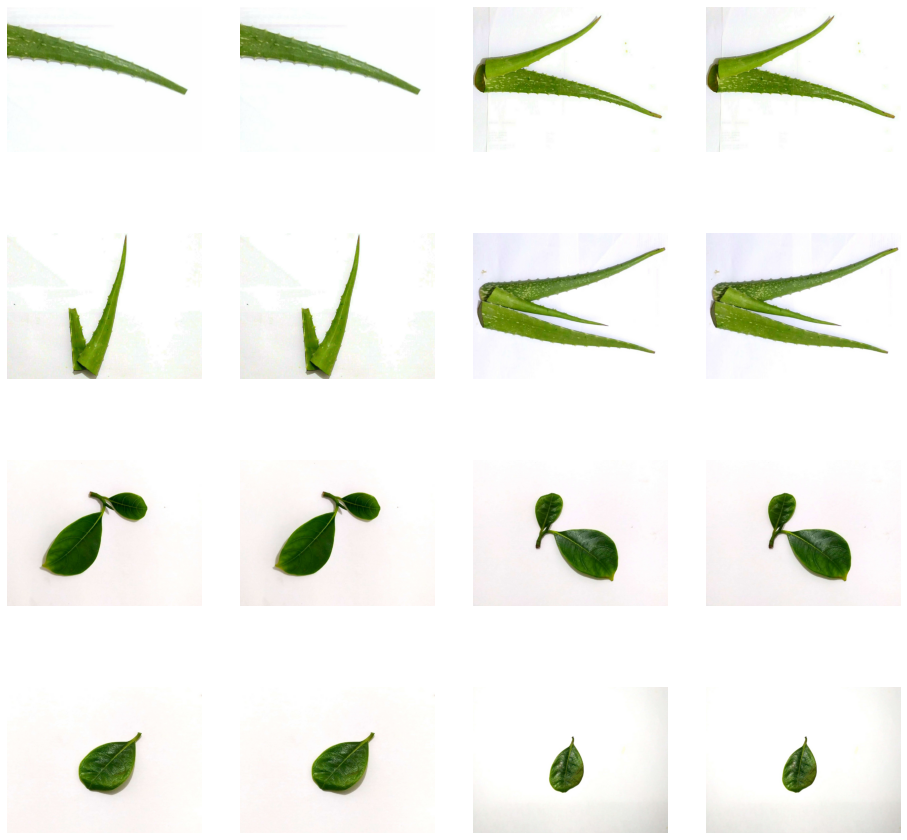

In [18]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_lbuaya_pix = [os.path.join(train_lbuaya_dir, fname) 
                for fname in train_lbuaya_fnames[pic_index-8:pic_index]]
next_nangka_pix = [os.path.join(train_nangka_dir, fname) 
                for fname in train_nangka_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_lbuaya_pix+next_nangka_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [19]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [20]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

In [21]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [22]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 100 images belonging to 4 classes.
Found 100 images belonging to 2 classes.


In [24]:
import keras as tf
# define the checkpoint
checkpoint_filepath="/content/drive/My Drive/dataset"
model_checkpoint_callback = tf.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      callbacks=[model_checkpoint_callback])


<ipython-input-24-810054cbf69c>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: -5045.6719 - acc: 0.4800

10/10 [==============================] - 59s 6s/step - loss: -5045.6719 - acc: 0.4800 - val_loss: 40203.6406 - val_acc: 0.5000
Epoch 2/5
10/10 [==============================] - 9s 912ms/step - loss: -196288.7656 - acc: 0.5000 - val_loss: 574478.3750 - val_acc: 0.5000
Epoch 3/5
10/10 [==============================] - 9s 909ms/step - loss: -1193315.5000 - acc: 0.5000 - val_loss: 2481497.5000 - val_acc: 0.5000
Epoch 4/5
10/10 [==============================] - 9s 915ms/step - loss: -4048664.0000 - acc: 0.5000 - val_loss: 6825951.5000 - val_acc: 0.5000
Epoch 5/5
10/10 [==============================] - 9s 929ms/step - loss: -9285608.0000 - acc: 0.5000 - val_loss: 14581265.0000 - val_acc: 0.5000


Text(0.5, 1.0, 'Validation loss')

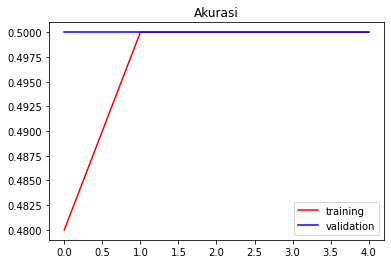

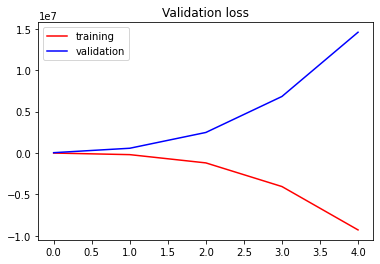

In [25]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'red',label='training')
plt.plot(epochs,val_acc,'blue',label='validation')
plt.legend()
plt.title('Akurasi')

plt.figure()

# Plot training and validation loss per epoch
#plt.plot(epochs, loss)
#plt.plot(epochs, val_loss)

plt.plot(epochs,loss,'r',label='training')
plt.plot(epochs,val_loss,'b',label='validation')
plt.legend()
plt.title('Validation loss')

In [ ]:
# from tensorflow.keras.models import load_model

# DIR = '/content/drive/My Drive/dataset'
# # load model
# model = load_model(DIR+'pandan-seledri-01-0.8200-1.0000.h5')


In [29]:
import numpy
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(25, 25),
        batch_size=10,
        class_mode='binary')
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

Found 25 images belonging to 2 classes.


In [34]:
# predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# predicted_classes = numpy.round(predictions, 0)

In [31]:
from keras import metrics
true_classes = test_data_generator.classes
class_labels = ['lbuaya','nangka']
#for i in range(2):
#  class_labels.append("kelas_"+str(i))
#print(len(class_labels))

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(true_classes, predicted_classes))

# report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
# print(report)